In [239]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [240]:
warnings.filterwarnings('ignore')

In [241]:
data = pd.read_csv("/content/DRREDDY.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,13280,2.002904e+12,NaN,NaN,NaN
1,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,57142,9.024405e+12,NaN,NaN,NaN
2,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,119697,1.909155e+13,NaN,NaN,NaN
3,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,121966,1.990625e+13,NaN,NaN,NaN
4,2000-01-07,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,79641,1.262497e+13,NaN,NaN,NaN


In [242]:
data.drop(['Date'], axis=1, inplace=True)

In [243]:
print(data.head())
print(data.shape)
print(data.columns)

    Symbol Series  Prev Close    Open     High      Low     Last    Close  \
0  DRREDDY     EQ     1396.50  1505.0  1508.25  1505.00  1508.25  1508.25   
1  DRREDDY     EQ     1508.25  1590.0  1628.95  1510.00  1628.95  1628.95   
2  DRREDDY     EQ     1628.95  1549.0  1650.00  1499.00  1566.00  1568.05   
3  DRREDDY     EQ     1568.05  1599.0  1693.50  1571.00  1693.50  1661.55   
4  DRREDDY     EQ     1661.55  1685.0  1685.00  1528.65  1528.65  1529.10   

      VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  1508.21   13280  2.002904e+12     NaN                 NaN          NaN  
1  1579.29   57142  9.024405e+12     NaN                 NaN          NaN  
2  1594.99  119697  1.909155e+13     NaN                 NaN          NaN  
3  1632.11  121966  1.990625e+13     NaN                 NaN          NaN  
4  1585.24   79641  1.262497e+13     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last'

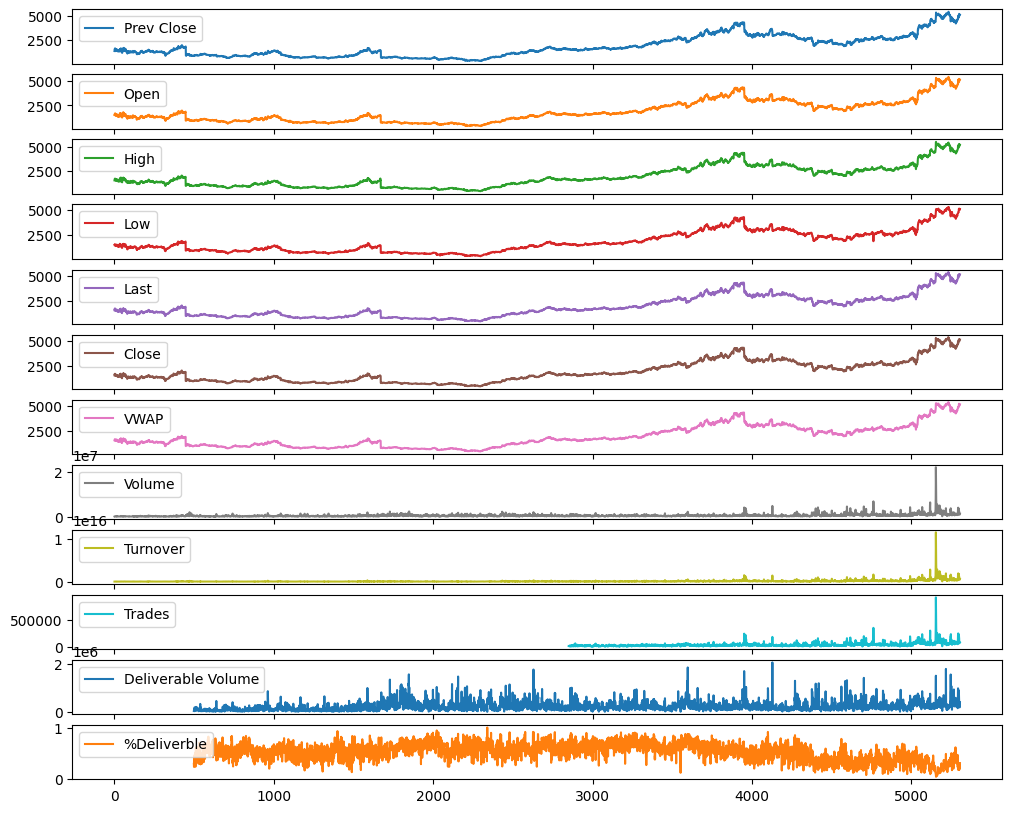

Symbol                   1
Series                   1
Prev Close            5047
Open                  3510
High                  4054
Low                   4242
Last                  4029
Close                 5047
VWAP                  5259
Volume                5277
Turnover              5306
Trades                2390
Deliverable Volume    4777
%Deliverble           3325
dtype: int64

In [244]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [245]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,13280,2.002904e+12,NaN,NaN,NaN
1,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,57142,9.024405e+12,NaN,NaN,NaN
2,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,119697,1.909155e+13,NaN,NaN,NaN
3,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,121966,1.990625e+13,NaN,NaN,NaN
4,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,79641,1.262497e+13,NaN,NaN,NaN


       Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0     DRREDDY     EQ     1396.50  1505.00  1508.25  1505.00  1508.25  1508.25   
1     DRREDDY     EQ     1508.25  1590.00  1628.95  1510.00  1628.95  1628.95   
2     DRREDDY     EQ     1628.95  1549.00  1650.00  1499.00  1566.00  1568.05   
3     DRREDDY     EQ     1568.05  1599.00  1693.50  1571.00  1693.50  1661.55   
4     DRREDDY     EQ     1661.55  1685.00  1685.00  1528.65  1528.65  1529.10   
...       ...    ...         ...      ...      ...      ...      ...      ...   
5301  DRREDDY     EQ     5066.70  5125.00  5130.00  5030.25  5067.00  5066.70   
5302  DRREDDY     EQ     5066.70  5090.50  5116.00  5021.35  5062.00  5057.25   
5303  DRREDDY     EQ     5057.25  5082.55  5106.90  5030.00  5048.00  5044.45   
5304  DRREDDY     EQ     5044.45  5070.25  5144.00  5042.30  5106.00  5102.30   
5305  DRREDDY     EQ     5102.30  5140.00  5211.00  5125.15  5169.00  5163.10   

         VWAP   Volume     

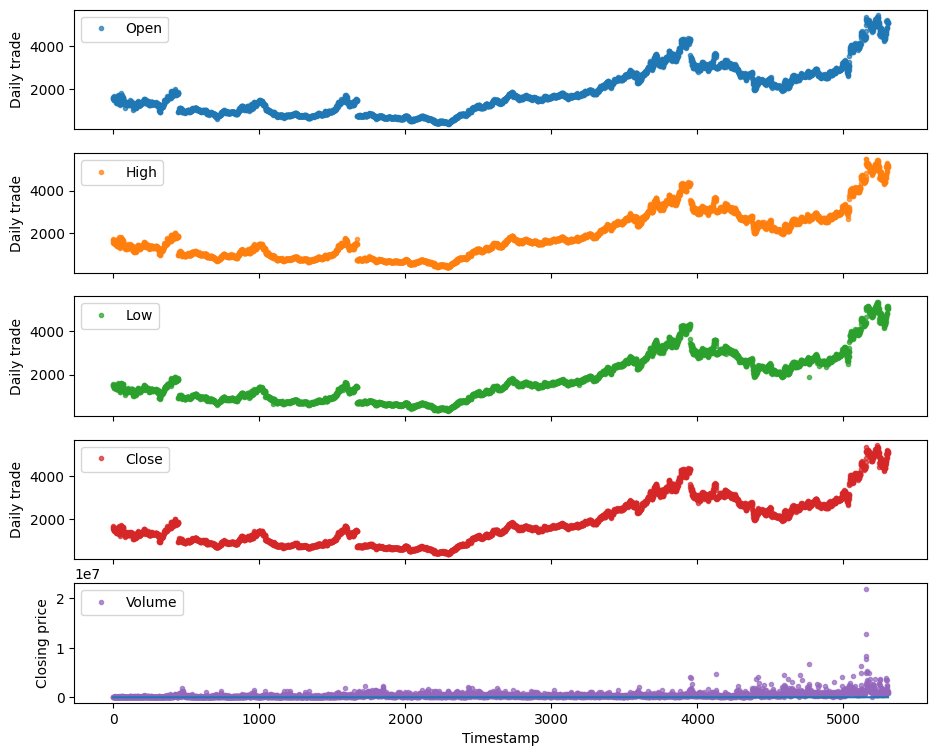

In [246]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [247]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

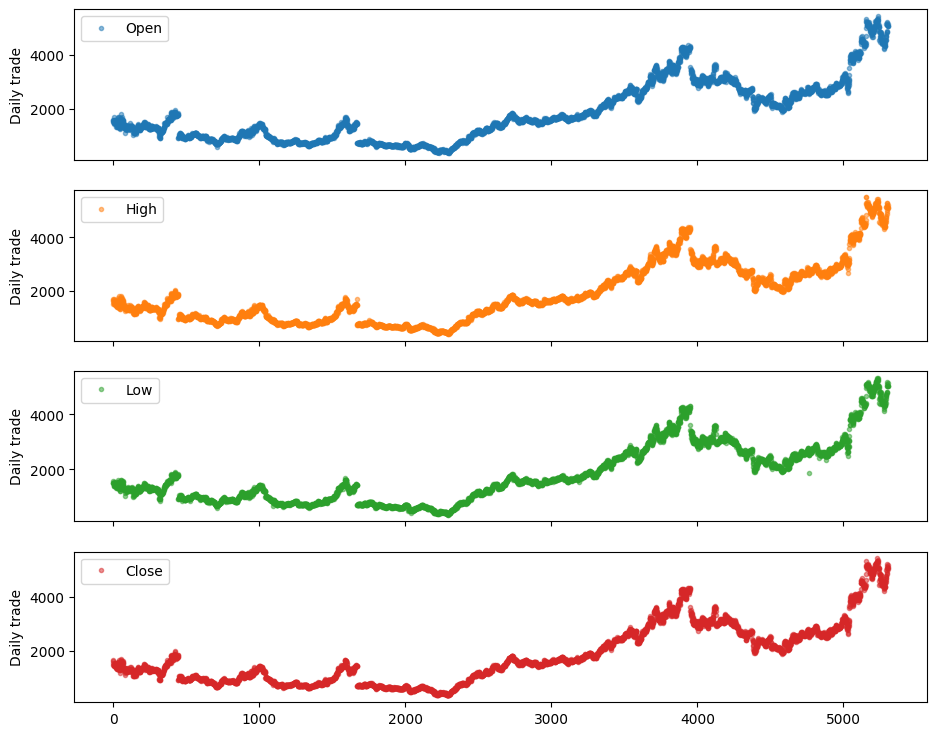

In [248]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

       Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0     DRREDDY     EQ     1396.50  1505.00  1508.25  1505.00  1508.25  1508.25   
1     DRREDDY     EQ     1508.25  1590.00  1628.95  1510.00  1628.95  1628.95   
2     DRREDDY     EQ     1628.95  1549.00  1650.00  1499.00  1566.00  1568.05   
3     DRREDDY     EQ     1568.05  1599.00  1693.50  1571.00  1693.50  1661.55   
4     DRREDDY     EQ     1661.55  1685.00  1685.00  1528.65  1528.65  1529.10   
...       ...    ...         ...      ...      ...      ...      ...      ...   
5301  DRREDDY     EQ     5066.70  5125.00  5130.00  5030.25  5067.00  5066.70   
5302  DRREDDY     EQ     5066.70  5090.50  5116.00  5021.35  5062.00  5057.25   
5303  DRREDDY     EQ     5057.25  5082.55  5106.90  5030.00  5048.00  5044.45   
5304  DRREDDY     EQ     5044.45  5070.25  5144.00  5042.30  5106.00  5102.30   
5305  DRREDDY     EQ     5102.30  5140.00  5211.00  5125.15  5169.00  5163.10   

         VWAP   Volume     

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,1.827673e+03,1.092984e+03,3.740000e+02,9.061750e+02,1.538825e+03,2.609338e+03,5.416800e+03
Open,5306.0,1.830100e+03,1.095535e+03,3.656500e+02,9.081750e+02,1.539500e+03,2.612000e+03,5.440950e+03
High,5306.0,1.855227e+03,1.106531e+03,3.849500e+02,9.231750e+02,1.565375e+03,2.641500e+03,5.512650e+03
Low,5306.0,1.803185e+03,1.082904e+03,3.552500e+02,8.970000e+02,1.511125e+03,2.582900e+03,5.329450e+03
Last,5306.0,1.828280e+03,1.093978e+03,3.751500e+02,9.061250e+02,1.539000e+03,2.609812e+03,5.413000e+03
Close,5306.0,1.828383e+03,1.093927e+03,3.740000e+02,9.061750e+02,1.539400e+03,2.609625e+03,5.416800e+03
VWAP,5306.0,1.829621e+03,1.094668e+03,3.725500e+02,9.078100e+02,1.540465e+03,2.608523e+03,5.396870e+03
Volume,5306.0,4.409815e+05,6.060398e+05,7.070000e+02,1.669668e+05,2.959825e+05,5.271700e+05,2.198715e+07
Turnover,5306.0,1.045022e+14,2.719076e+14,4.333085e+10,1.787360e+13,4.506694e+13,1.020985e+14,1.157853e+16
Trades,2456.0,3.712119e+04,3.921389e+04,4.500000e+02,1.773100e+04,2.711500e+04,4.313875e+04,9.298010e+05


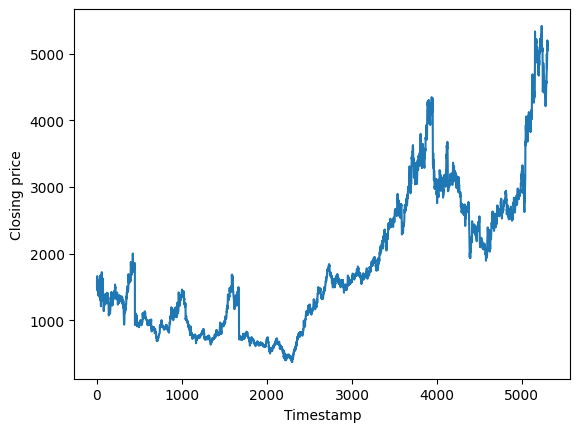

In [249]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [250]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [251]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 3s 12ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0798 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0382
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0345 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0292
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0289 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0250
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0255 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0247
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0232 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0252
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0222 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0245
Epoch 7/100
66/66 [==

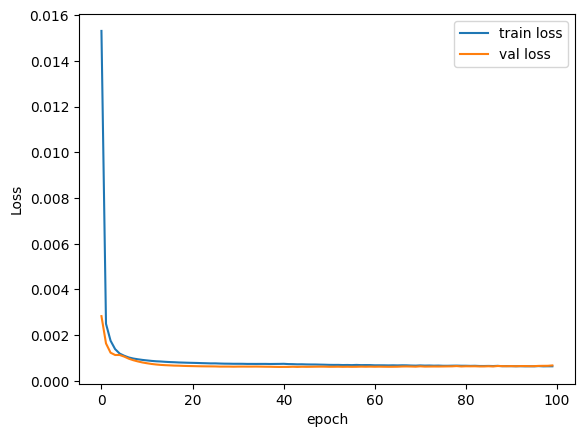

In [252]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

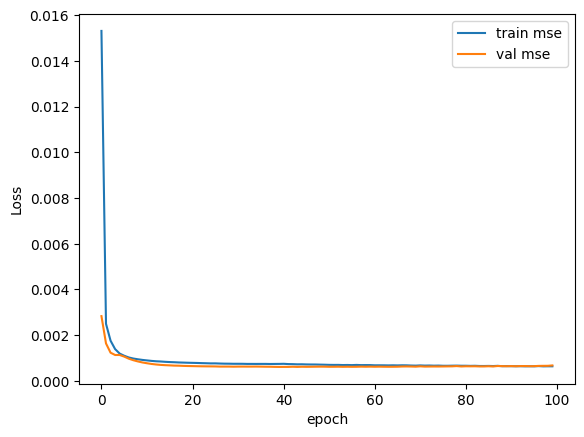

In [253]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

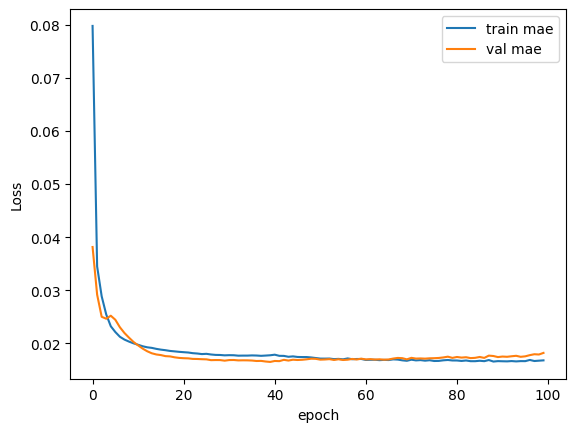

In [254]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_19 (LSTM)              (None, 32)                6272      
                                                                 
 dense_45 (Dense)            (None, 64)                2112      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 activation_27 (Activation)  (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 activation_28 (Activation)  (None, 64)               

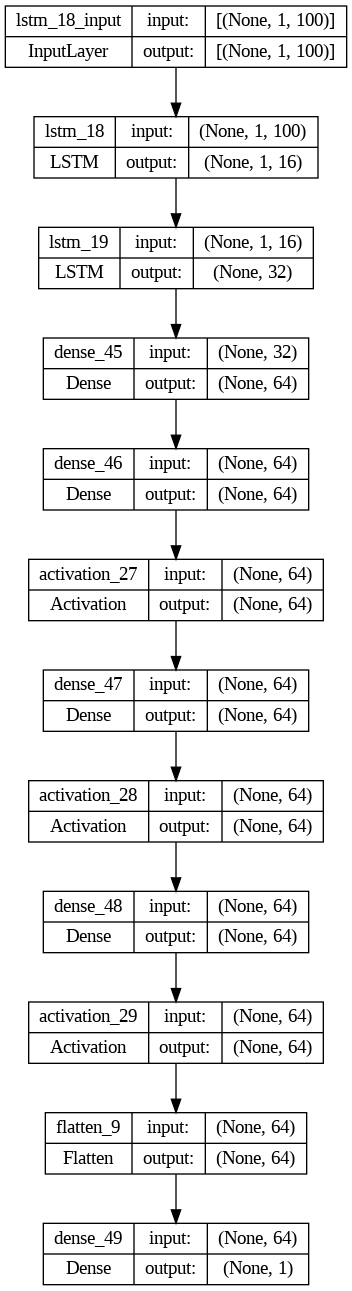

In [255]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [256]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 6.7613e-04 - mse: 6.7613e-04 - mae: 0.0182


[0.0006761284312233329, 0.0006761284312233329, 0.018227573484182358]

In [257]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.987286
R2 Score: 0.986934
Max Error: 0.189712


33/33 [==============================] - 0s 1ms/step


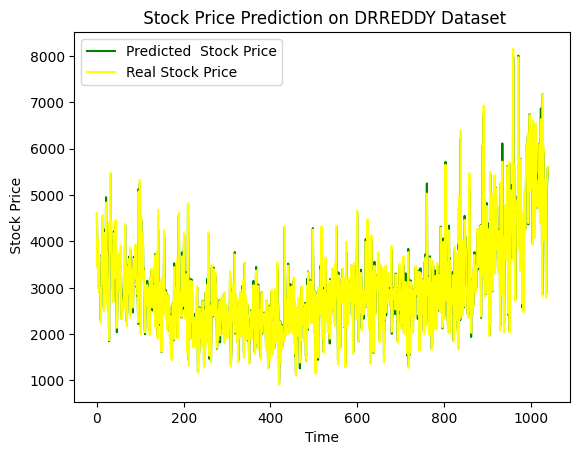

In [258]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on DRREDDY Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

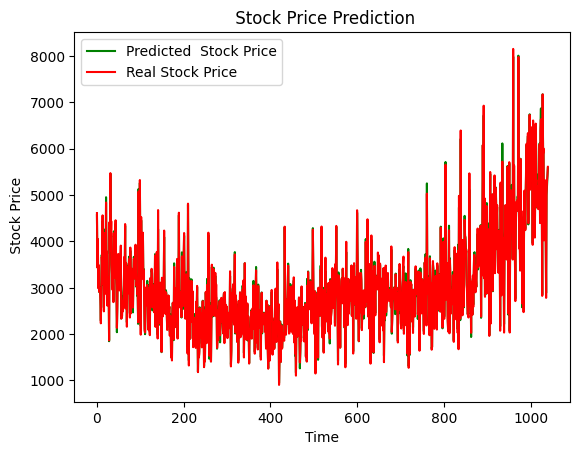

In [259]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [260]:
predicted

array([[4565.46  ],
       [3441.3086],
       [4051.4124],
       ...,
       [5207.8906],
       [5450.0723],
       [5582.376 ]], dtype=float32)

In [261]:
test_label

array([[4613.07622371],
       [3438.04216234],
       [4049.42436306],
       ...,
       [5310.46119279],
       [5417.13031062],
       [5610.34090403]])

In [262]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0      4613.076224      4565.459961
1      3438.042162      3441.308594
2      4049.424363      4051.412354
3      2991.399276      3020.558838
4      3492.187261      3466.390381
...            ...              ...
1036   2782.387272      2886.838867
1037   5023.562763      4997.049316
1038   5310.461193      5207.890625
1039   5417.130311      5450.072266
1040   5610.340904      5582.375977

[1041 rows x 2 columns]


In [263]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 4613.0762237120025 |  4565.4599609375   |
|  1   | 3438.0421623439406 |   3441.30859375    |
|  2   | 4049.4243630573246 | 4051.412353515625  |
|  3   | 2991.3992761605036 | 3020.558837890625  |
|  4   | 3492.1872607030978 | 3466.390380859375  |
|  5   | 2914.3928305594427 | 2910.150146484375  |
|  6   | 2913.369978013192  | 2917.875732421875  |
|  7   | 2983.2602617156913 | 3016.368896484375  |
|  8   | 2700.3487940630794 | 2765.136962890625  |
|  9   | 2233.342092914125  | 2289.655029296875  |
|  10  | 2919.7704571682198 | 2949.396728515625  |
|  11  | 3666.181193062369  | 3708.883544921875  |
|  12  | 3486.116283004185  |    3618.8984375    |
|  13  | 4562.906930561991  |   4441.193359375   |
|  14  | 3081.186299515902  | 3065.512939453125  |
|  15  | 3588.369676917682  | 3657.552490234375  |
|  16  | 2491.151940391183  | 2

In [264]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_19 (LSTM)              (None, 32)                6272      
                                                                 
 dense_45 (Dense)            (None, 64)                2112      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 activation_27 (Activation)  (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 activation_28 (Activation)  (None, 64)               

In [265]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))